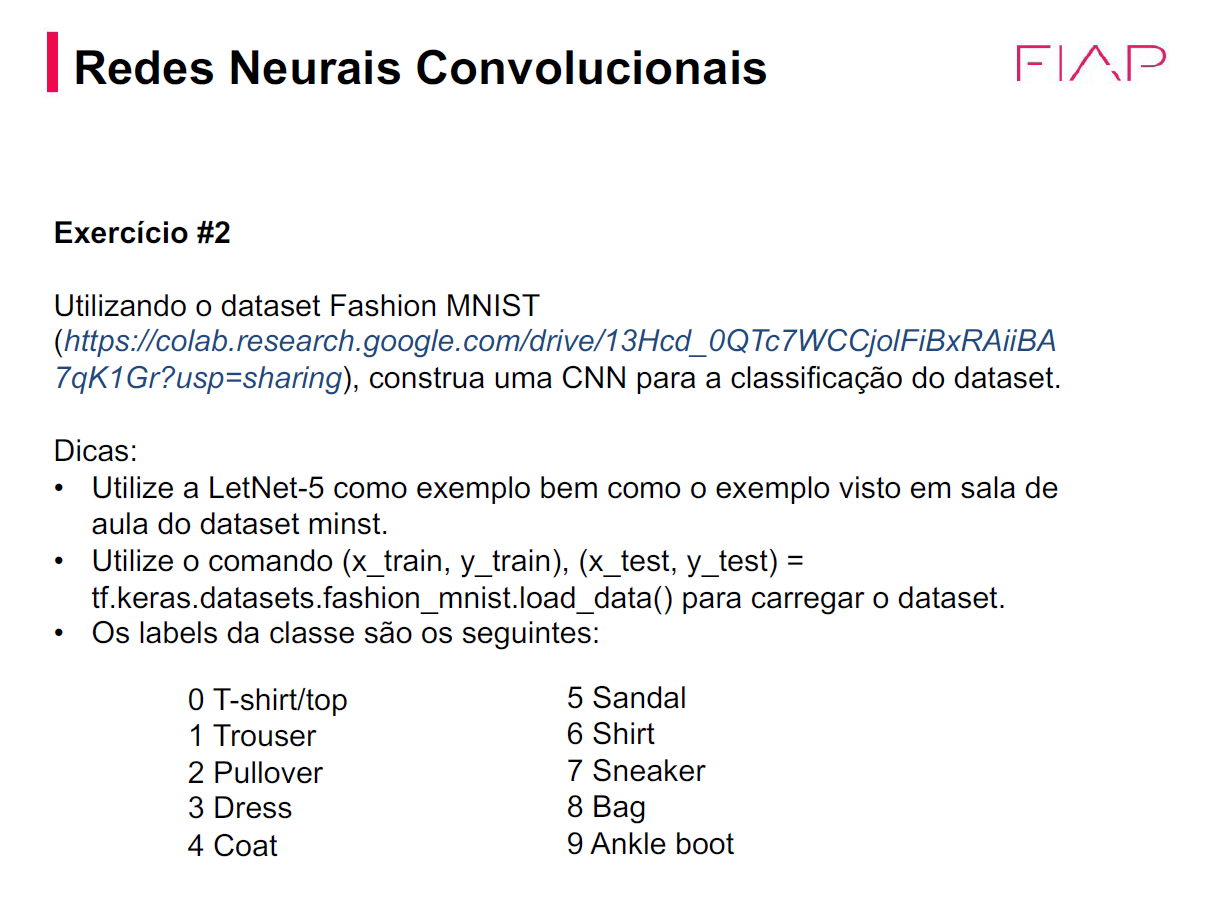

### Trabalho desenvolvido durante o MBA em Data Science / IA na FIAP - 2022~2023.

### Prof. Felipe Teodoro

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.utils import plot_model
from keras import backend as K
import numpy as np
from sklearn.model_selection import train_test_split

*Os imports acima foram alterados a partir do original para funcionar com as versões atuais (Set/2023) do Keras no Google Collab.*

## Carga dos dados do Dataset Fashion MINST

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## Verificação do Dataset

### Classes e Labels

In [3]:
set(y_test)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [4]:
labels = [ 'T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'  ]

### Dimensões dos conjuntos de treino e teste

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


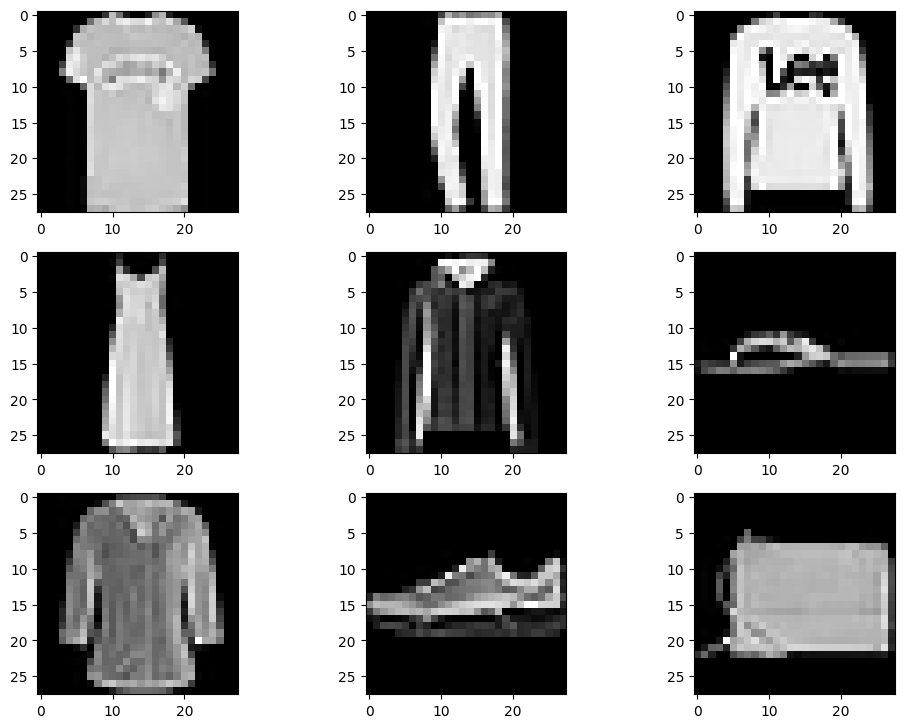

In [6]:
classes = set(y_test)

plt.figure(figsize = (12, 12))

for c in classes:
  idx =  np.where(y_test == c)
  if c + 1 == 10:
    break
  plt.subplot(430 + 1 + c)
  # plot raw pixel data
  plt.imshow(X_test[idx[0][0]], cmap = plt.get_cmap('gray'))

plt.show()

## Preparação dos Dados

### Normalização das imagens

As imagens estão coloridas e por isso vamos normaliza-las para que os valores estejam no intervalo [0,1].

In [7]:
X_train, X_test = X_train / 255.0, X_test / 255.0

### Gerar os vetores com as classes do conjunto de dados de treinamento e teste

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


In [10]:
print(num_classes)

10


## Criação do Modelo - Arquitetura LetNet-5

In [11]:
# Inicialização
model = Sequential()

# Camada Conv2D com 6 filtros de dimensão 5x5 e função de ativação 'relu'
model.add(Conv2D(6, (5, 5), activation = 'relu', input_shape = (28, 28, 1)))

# Camada MaxPooling2D com dimensão (2, 2)
model.add(MaxPooling2D((2, 2)))

# Camada Conv2D com 16 filtros de dimensão 5x5 e função de ativação 'relu'
model.add(Conv2D(16, (5, 5), activation = 'relu'))

# Camada MaxPooling2D com dimensão (2, 2)
model.add(MaxPooling2D((2, 2)))

# Camada Flatten para saída em vetor unidimensional
model.add(Flatten())

# Camada Densa totalmente conectada com 120 neurônios e função de ativação 'relu'
model.add(Dense(120, activation = 'relu'))

# Camada Dense (totalmente conectada) com 84 neurônios e função de ativação 'relu'
model.add(Dense(84, activation = 'relu'))

# Camada de saída com 10 neurônios e ativação 'softmax' para classificação das classes
model.add(Dense(10, activation = 'softmax'))

 ### Visualizar a Arquitetura do Modelo Criado

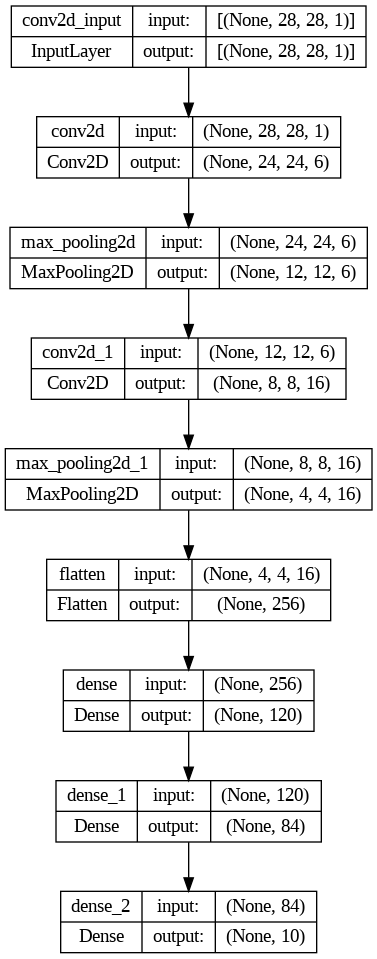

In [12]:
plot_model(model, to_file='lenet5.png', show_shapes=True)

### Compilar o Modelo

In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### Treinamento do modelo

Aqui utilizamos EarlyStopping para encontrar automaticamente quando parar o treinamento com base na métrica especificada (acurácia).

In [14]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

In [15]:
treinamento = model.fit(X_train, y_train, validation_split = 0.25, epochs = 100, batch_size = 128, callbacks=[early_stopping])

Epoch 1/100
352/352 [==============================] - 17s 11ms/step - loss: 0.7236 - accuracy: 0.7377 - val_loss: 0.5474 - val_accuracy: 0.7995
Epoch 2/100
352/352 [==============================] - 2s 7ms/step - loss: 0.4592 - accuracy: 0.8341 - val_loss: 0.4388 - val_accuracy: 0.8426
Epoch 3/100
352/352 [==============================] - 2s 7ms/step - loss: 0.4073 - accuracy: 0.8545 - val_loss: 0.4113 - val_accuracy: 0.8524
Epoch 4/100
352/352 [==============================] - 3s 7ms/step - loss: 0.3741 - accuracy: 0.8664 - val_loss: 0.3985 - val_accuracy: 0.8536
Epoch 5/100
352/352 [==============================] - 4s 11ms/step - loss: 0.3497 - accuracy: 0.8738 - val_loss: 0.3708 - val_accuracy: 0.8706
Epoch 6/100
352/352 [==============================] - 3s 9ms/step - loss: 0.3322 - accuracy: 0.8799 - val_loss: 0.3572 - val_accuracy: 0.8727
Epoch 7/100
352/352 [==============================] - 2s 7ms/step - loss: 0.3150 - accuracy: 0.8844 - val_loss: 0.3328 - val_accuracy: 0.8

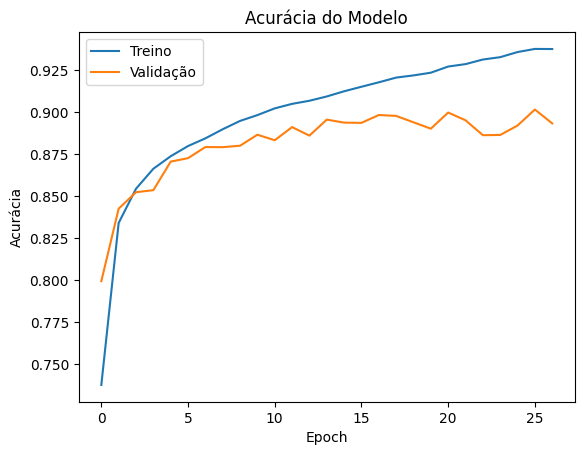

In [16]:
plt.figure(1)
plt.plot(treinamento.history['accuracy'])
plt.plot(treinamento.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()

In [17]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurária da CNN: %.2f%%" % (scores[1]*100))

Erro da CNN: 10.78%
Acurária da CNN: 89.22%


In [18]:
scores

[0.31171655654907227, 0.8921999931335449]

## Previsões a partir do conjunto de testes

In [19]:
predicted = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [20]:
predicted_classes = np.argmax(predicted, axis = 1)
correct_classes = np.argmax(y_test, axis = 1)

### Plot das previsões para conferência

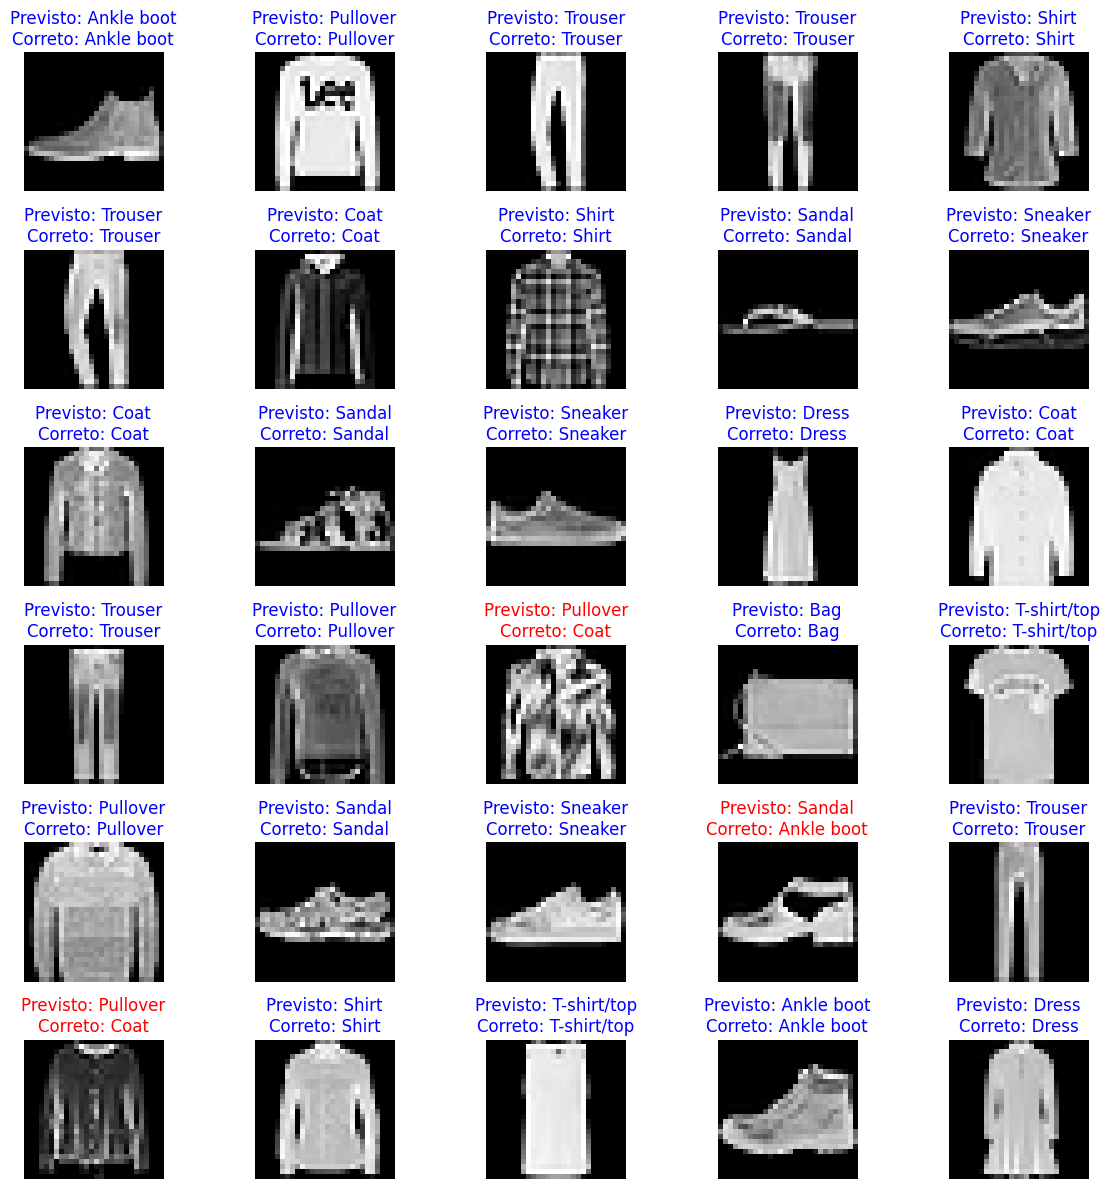

In [21]:
plt.figure(figsize = (12, 12))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap = 'gray')
    t_color = 'blue' if predicted_classes[i] == correct_classes[i] else 'red'
    plt.title(f'Previsto: {labels[predicted_classes[i]]}\nCorreto: {labels[correct_classes[i]]}', color = t_color)
    plt.axis('off')

plt.tight_layout()
plt.show()